In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from itertools import cycle, islice
import matplotlib.pyplot as plt
%matplotlib inline 
import pylab
import math
from pandas.plotting import parallel_coordinates
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import AgglomerativeClustering

In [2]:
df = pd.read_csv('/content/Wholesale customers data.csv')

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.shape 

(440, 8)

In [5]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [7]:
df.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [8]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


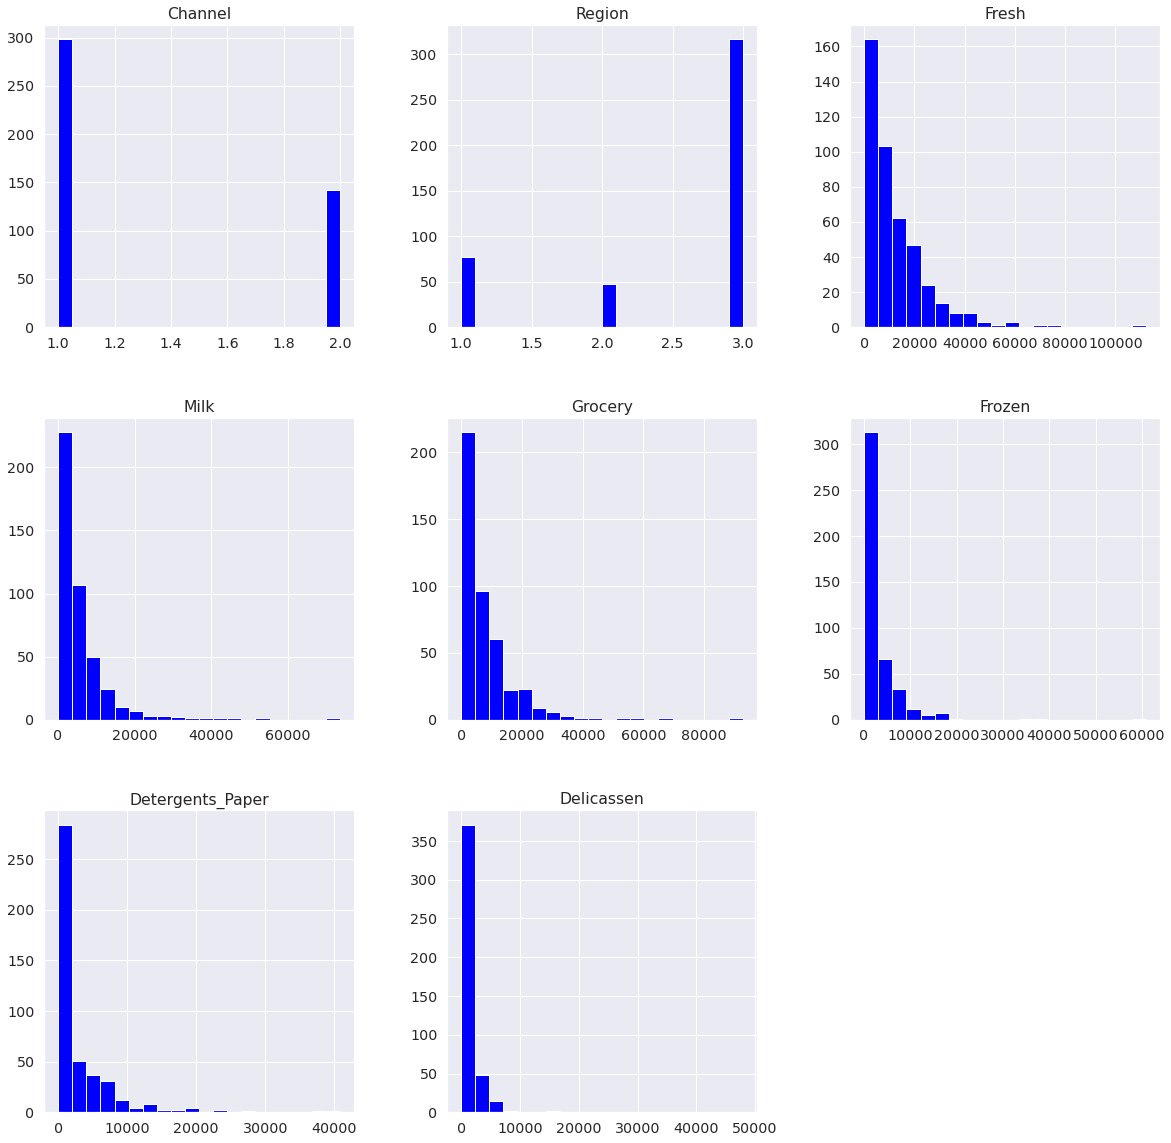

In [9]:
sns.set(font_scale=1.3, rc={'figure.figsize':(20,20)})
ax=df.hist(bins=20,color='blue' )

In [10]:
for col in df:
    print('\n%s column: '%col)
    print(df[col].nunique())


Channel column: 
2

Region column: 
3

Fresh column: 
433

Milk column: 
421

Grocery column: 
430

Frozen column: 
426

Detergents_Paper column: 
417

Delicassen column: 
403


In [11]:
for col in df:
    print('\n%s column: '%col)
    print(df[col].unique())


Channel column: 
[2 1]

Region column: 
[3 1 2]

Fresh column: 
[ 12669   7057   6353  13265  22615   9413  12126   7579   5963   6006
   3366  13146  31714  21217  24653  10253   1020   5876  18601   7780
  17546   5567  31276  26373  22647  16165   9898  14276   4113  43088
  18815   2612  21632  29729   1502    688  29955  15168   4591  56159
  24025  19176  10850    630   9670   5181   3103  44466  11519   4967
   6269   3347  40721    491  27329   5264   4098   5417  13779   6137
   8590  35942   7823   9396   4760     85      9  19913   2446   8352
  16705  18291   4420  19899   8190  20398    717  12205  10766   1640
   7005    219  10362  20874  11867  16117  22925  43265   7864  24904
  11405  12754   9198  11314   5626      3     23    403    503   9658
  11594   1420   2932  56082  14100  15587   1454   8797   1531   1406
  11818  12579  19046  14438  18044  11134  11173   6990  20049   8258
  17160   4020  12212  11170  36050  76237  19219  21465    140  42312
   7149   21

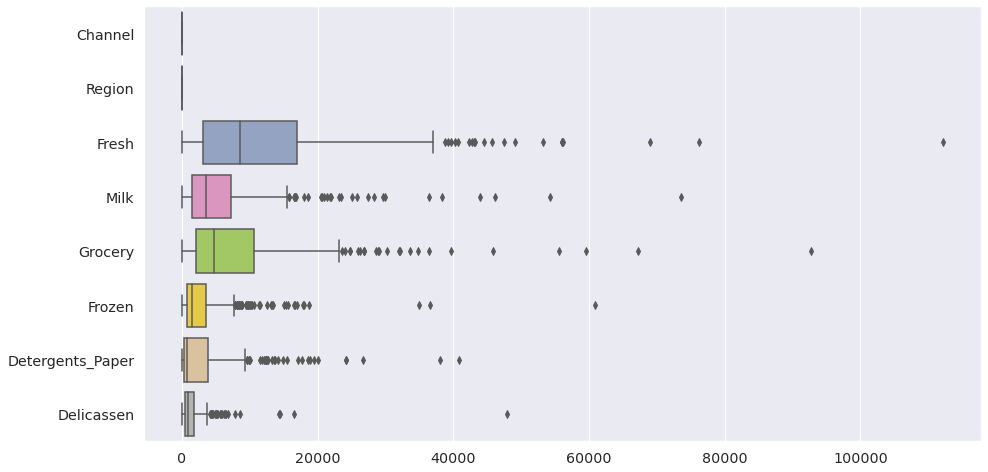

In [12]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df, orient="h", palette="Set2")

Outliers are present in columns 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'  not removing the outlier, keeping aside

In [13]:
df.corr()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


Correlation Heat map of the data


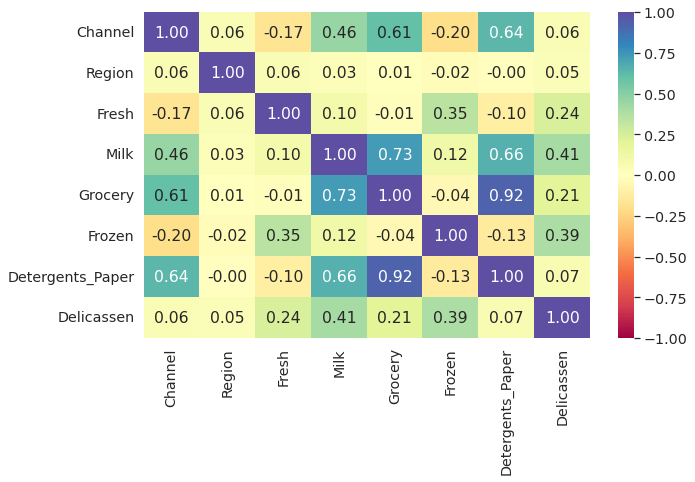

In [14]:
print('Correlation Heat map of the data')
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,fmt='.2f',vmin=-1,vmax=1,cmap='Spectral')
plt.show()

# **MODELLING **

In [15]:
#Applying K-means clustering on main dataset
y=[]
for km in np.arange(2,10):
    kmeans = KMeans( n_clusters = km, init='k-means++',random_state=42)
    kmeans.fit(df)
    y.append(kmeans.inertia_)

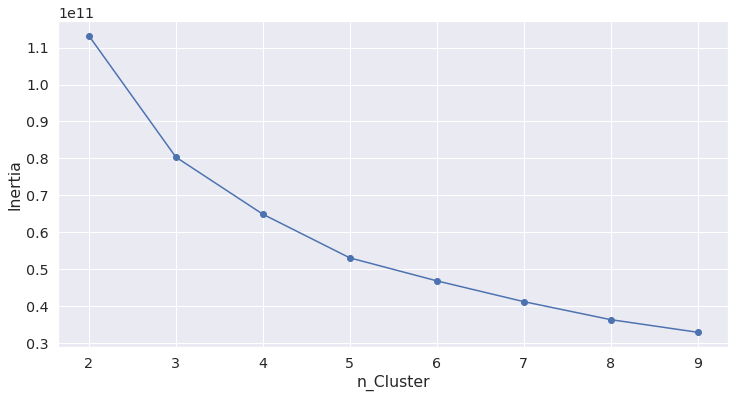

In [16]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(2,10),y,'o-' )
plt.xlabel('n_Cluster')
plt.ylabel('Inertia')
plt.show()

In [17]:
kmean_model=KMeans(n_clusters=3,init='k-means++',random_state=42)
kmean_model.fit(df)
predict=kmean_model.predict(df)

In [18]:
predict

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 2, 0, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 2, 0, 0, 1, 1, 2,
       1, 2, 2, 2, 1, 2, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0,
       1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 2, 2, 0, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [19]:
df['K-Means_cluster'] = predict
df['K-Means_cluster'].value_counts()

1    330
0     60
2     50
Name: K-Means_cluster, dtype: int64

In [20]:
df.drop('K-Means_cluster',axis= 1,inplace=True)

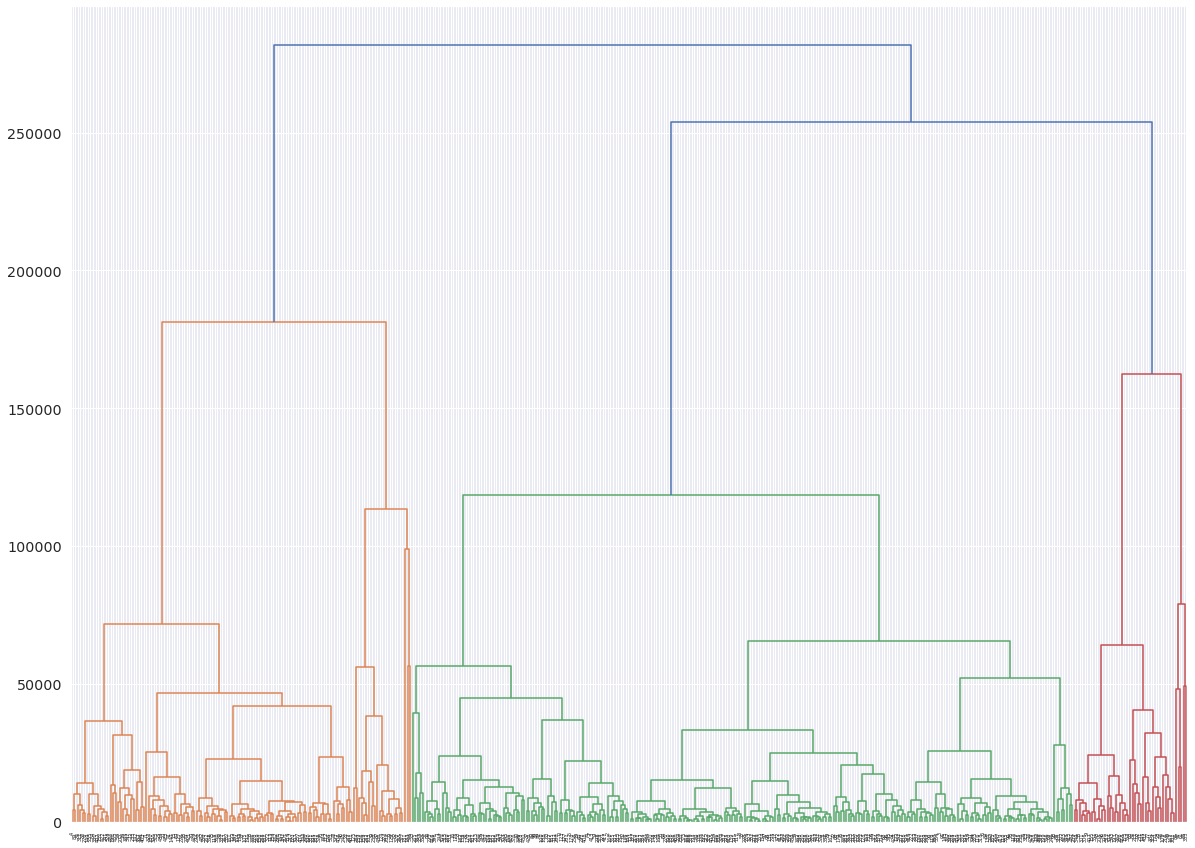

In [21]:
#hierarchy method
link=linkage(df,method='ward')
plt.figure(figsize=(20,15))
dendrogram(link,orientation='top',distance_sort='ascending',show_leaf_counts=True)
plt.show()

In [22]:
hm=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
predict1=hm.fit_predict(df)

In [23]:
predict1

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1,
       2, 1, 1, 1, 2, 1, 2, 2, 0, 2, 0, 2, 1, 2, 0, 2, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 0, 2, 1, 1, 0,
       2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 1,
       2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 1, 2, 2, 2, 0, 0, 2, 0, 2,
       2, 1, 2, 0, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2,
       0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 1, 2, 0, 0, 2,
       2, 2, 1, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 1, 2, 2, 2, 2, 1, 0, 2, 2,
       0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0,
       0, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2,
       2, 2, 1, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0,

In [24]:
df['hierarchycluster'] = predict1
df['hierarchycluster'].value_counts()

2    261
0    134
1     45
Name: hierarchycluster, dtype: int64

In [25]:
df.drop('hierarchycluster',axis= 1,inplace=True)

# **After preprocessing**

In [26]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [27]:
from sklearn import preprocessing
normalized = preprocessing.normalize(df)
print("Normalized Data = ", normalized)

Normalized Data =  [[1.11821406e-04 1.67732109e-04 7.08332695e-01 ... 1.19648904e-02
  1.49505220e-01 7.48085205e-02]
 [1.25321880e-04 1.87982820e-04 4.42198253e-01 ... 1.10408576e-01
  2.06342475e-01 1.11285829e-01]
 [1.24839188e-04 1.87258782e-04 3.96551681e-01 ... 1.50119124e-01
  2.19467293e-01 4.89619296e-01]
 ...
 [5.01633106e-05 7.52449659e-05 3.64461533e-01 ... 1.09606834e-02
  3.72236846e-01 4.68274505e-02]
 [9.11309417e-05 2.73392825e-04 9.37737390e-01 ... 9.45939175e-02
  1.53099982e-02 1.93653251e-01]
 [2.41225630e-04 7.23676891e-04 6.72295832e-01 ... 1.56796660e-02
  1.15064626e-01 1.25437328e-02]]


In [28]:
Normalized_data = pd.DataFrame(normalized, columns = df.columns)

In [29]:
Normalized_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


In [30]:
Normalized_data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.000105,0.000230,0.608111,0.306342,0.414267,0.185777,0.137032,0.087564
std,0.000110,0.000329,0.339614,0.216936,0.267369,0.200710,0.149245,0.089597
min,0.000008,0.000018,0.000175,0.005848,0.000143,0.000644,0.000143,0.000077
25%,0.000053,0.000092,0.285100,0.123490,0.164689,0.045811,0.020551,0.030020
50%,0.000085,0.000155,0.722229,0.251437,0.375277,0.112828,0.062453,0.062284
75%,0.000125,0.000250,0.927366,0.455574,0.654840,0.243927,0.242912,0.117928
max,0.001553,0.004660,0.999391,0.926102,0.976789,0.944218,0.903593,0.642610


In [31]:
#K-means Clustering
y=[]
for km in np.arange(2,10):
    kmeans = KMeans( n_clusters = km, init='k-means++',random_state=42)
    kmeans.fit(Normalized_data)
    y.append(kmeans.inertia_)

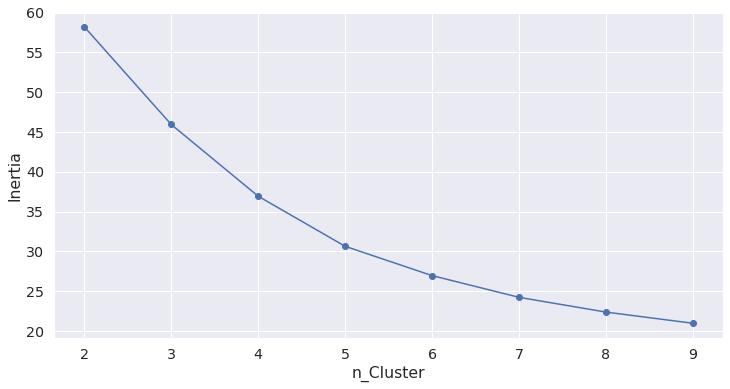

In [32]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(2,10),y,'o-' )
plt.xlabel('n_Cluster')
plt.ylabel('Inertia')
plt.show()

In [33]:
kmean_model=KMeans(n_clusters=3,init='k-means++',random_state=42)
kmean_model.fit(Normalized_data)
predict=kmean_model.predict(Normalized_data)
predict

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 2,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0,
       0, 1, 2, 1, 2, 0, 2, 1, 0, 1, 2, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       2, 1, 1, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 0, 1, 2, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 2, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 2, 1, 1, 0, 2, 0, 1, 2, 0, 0, 0, 1, 1, 1, 0, 1, 1, 2, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 2, 2, 1, 1, 1, 2, 0, 2, 2, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 2, 2, 0, 2, 1, 0, 1, 1, 2, 1, 1, 1, 2, 1, 0,
       0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 1, 0, 0, 0, 1,

In [34]:
Normalized_data['K-means_cluster_Normalized'] = predict
Normalized_data['K-means_cluster_Normalized'].value_counts()

1    210
0    177
2     53
Name: K-means_cluster_Normalized, dtype: int64

In [35]:
Normalized_data.drop('K-means_cluster_Normalized',axis= 1,inplace=True)

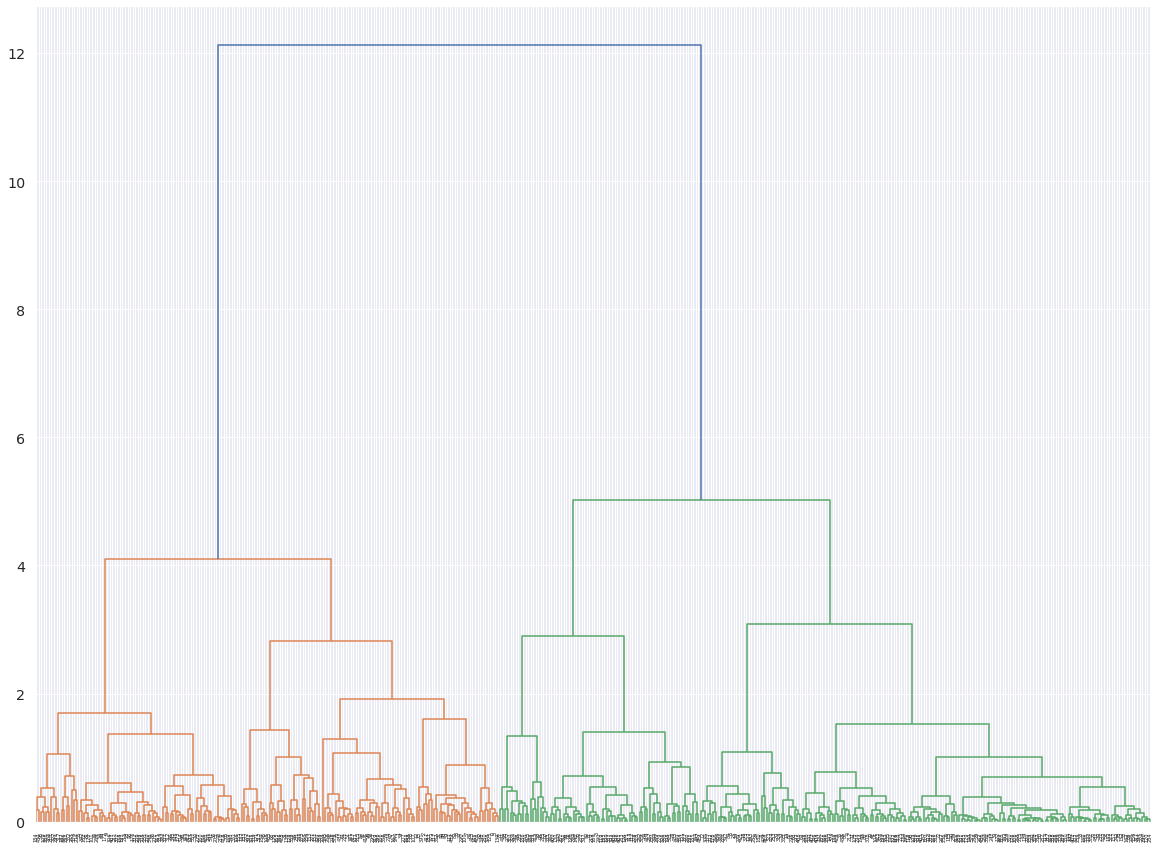

In [36]:
#hierarchy method for normalized data
link=linkage(Normalized_data,method='ward')
plt.figure(figsize=(20,15))
dendrogram(link,orientation='top',distance_sort='ascending',show_leaf_counts=True)
plt.show()

In [37]:
hm=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
predict1=hm.fit_predict(Normalized_data)
predict1

array([0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0,
       0, 1, 0, 1, 2, 1, 2, 2, 0, 1, 2, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       2, 1, 1, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 2, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 0, 1, 1, 2, 1, 0, 1, 2, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 2, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 2, 2, 0, 0, 0, 2, 1, 1, 0, 1, 2, 2, 0,
       2, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 2,
       1, 0, 2, 2, 1, 1, 1, 2, 0, 2, 2, 0, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1,
       1, 1, 0, 0, 1, 1, 1, 2, 2, 0, 2, 1, 0, 1, 1, 2, 1, 1, 1, 2, 1, 0,
       0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 1, 2, 2, 1, 0, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 0, 2, 0, 0, 1, 1, 1, 1, 0, 0, 1,

In [38]:
Normalized_data['Hierarchy_Cluster_Normalized'] = predict1
Normalized_data['Hierarchy_Cluster_Normalized'].value_counts()

0    183
1    178
2     79
Name: Hierarchy_Cluster_Normalized, dtype: int64

In [39]:
Normalized_data.drop('Hierarchy_Cluster_Normalized',axis= 1,inplace=True)

# Performing PCA for Dimensionality reduction

In [40]:
Normalized_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca.fit(Normalized_data)
pca_data = pca.transform(Normalized_data)

In [42]:
pca_data

array([[ 0.03403705, -0.18042088,  0.22975424],
       [ 0.35105737, -0.04664416,  0.18028567],
       [ 0.30537543,  0.05555107,  0.22151184],
       ...,
       [ 0.46483711, -0.1918836 , -0.10897555],
       [-0.41200132, -0.12067567,  0.05906545],
       [ 0.10296864, -0.21244563,  0.03842037]])

In [43]:
pca_data.shape

(440, 3)

In [44]:
pca.explained_variance_ratio_

array([0.68188469, 0.14615157, 0.09622214])

In [45]:
pd.DataFrame(pca.components_, columns = Normalized_data.columns, index= ["PC-1", "PC-2", "PC-3"])

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
PC-1,0.000037,0.000016,-0.720606,0.344109,0.537571,-0.106800,0.247658,0.024347
PC-2,0.000072,0.000257,-0.325226,0.057227,-0.220449,0.898543,-0.167915,0.082343
PC-3,-0.000012,0.000034,0.066263,0.853474,-0.405896,-0.183399,-0.206943,0.161182


In [46]:
#K-means Clustering
y=[]
for km in np.arange(2,10):
    kmeans = KMeans( n_clusters = km, init='k-means++',random_state=42)
    kmeans.fit(pca_data)
    y.append(kmeans.inertia_)

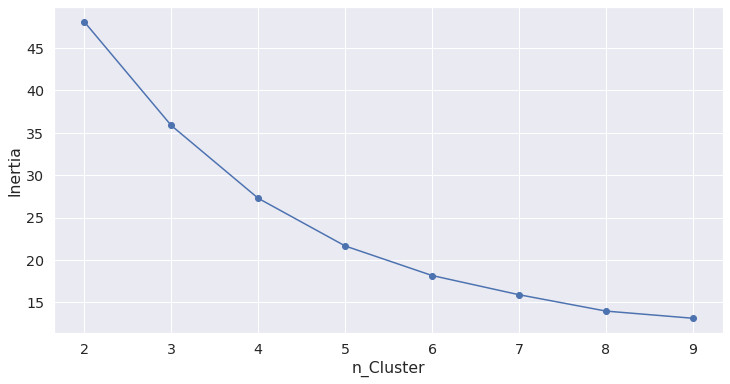

In [47]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(2,10),y,'o-' )
plt.xlabel('n_Cluster')
plt.ylabel('Inertia')
plt.show()

In [48]:
kmean_model=KMeans(n_clusters=3,init='k-means++',random_state=42)
kmean_model.fit(Normalized_data)
predict=kmean_model.predict(Normalized_data)
predict
Normalized_data['K-means_cluster_PCA'] = predict
Normalized_data['K-means_cluster_PCA'].value_counts()

1    210
0    177
2     53
Name: K-means_cluster_PCA, dtype: int64

In [49]:
Normalized_data.drop('K-means_cluster_PCA',axis= 1,inplace=True)

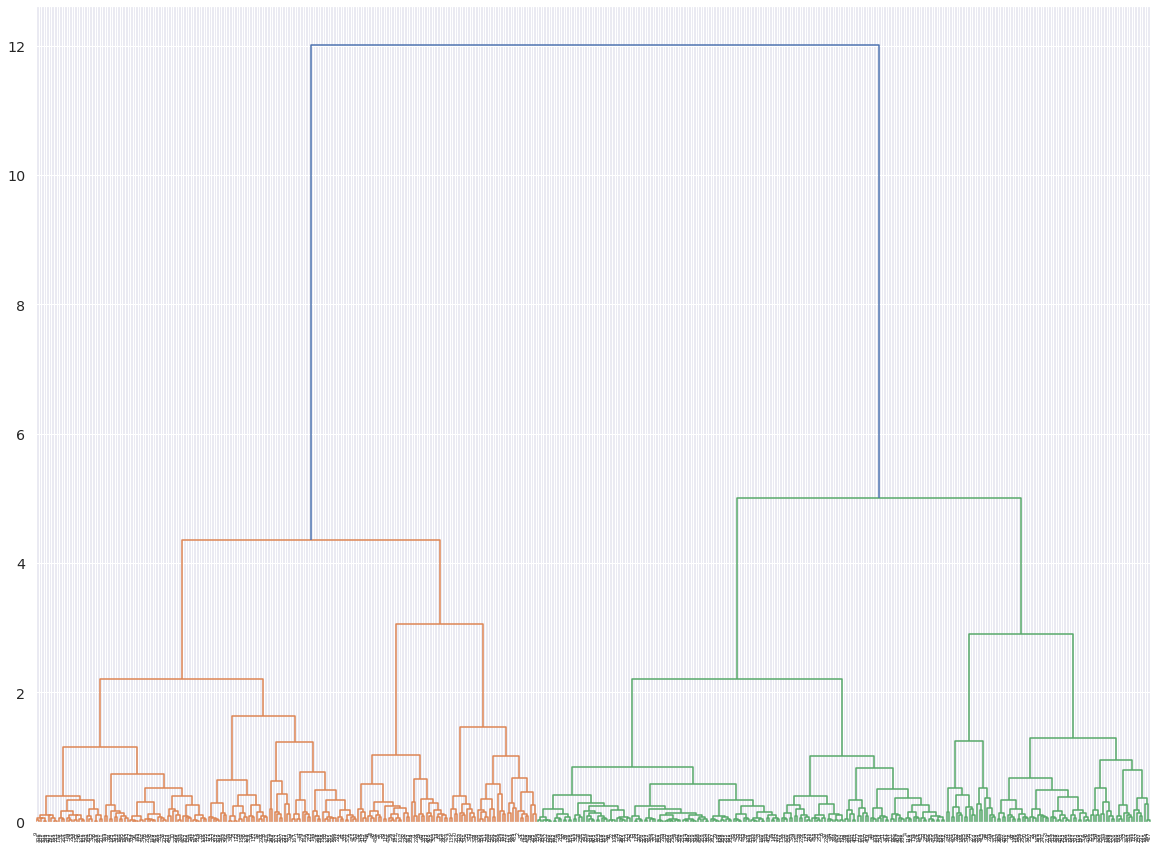

In [50]:
#hierarchy method for normalized data
link=linkage(pca_data,method='ward')
plt.figure(figsize=(20,15))
dendrogram(link,orientation='top',distance_sort='ascending',show_leaf_counts=True)
plt.show()

In [51]:
hm=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
predict1=hm.fit_predict(Normalized_data)
predict1

array([0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0,
       0, 1, 0, 1, 2, 1, 2, 2, 0, 1, 2, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       2, 1, 1, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 2, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 0, 1, 1, 2, 1, 0, 1, 2, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 2, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 2, 2, 0, 0, 0, 2, 1, 1, 0, 1, 2, 2, 0,
       2, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 2,
       1, 0, 2, 2, 1, 1, 1, 2, 0, 2, 2, 0, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1,
       1, 1, 0, 0, 1, 1, 1, 2, 2, 0, 2, 1, 0, 1, 1, 2, 1, 1, 1, 2, 1, 0,
       0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 1, 2, 2, 1, 0, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 0, 2, 0, 0, 1, 1, 1, 1, 0, 0, 1,

In [52]:
Normalized_data['Hierarchy_Cluster_PCA'] = predict1
Normalized_data['Hierarchy_Cluster_PCA'].value_counts()

0    183
1    178
2     79
Name: Hierarchy_Cluster_PCA, dtype: int64

In [53]:
Normalized_data.drop('Hierarchy_Cluster_PCA',axis= 1,inplace=True)